In [2]:
# Data Preparation  데이터 전처리

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path ='../python-data-analysis-master/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')


In [3]:
#***** 변환하는 법 , 형 변환 하는법
print('$16.11')
print('$16.77' [1:])

#인덱스 1부터 불러와서 앞에 달러 표시를 없애버림 ㄷㄷ 천재적

print()
print(type('$16.11'))

float('$16.11'[1:])


### 람다 알아보기

$16.11
16.77

<class 'str'>


16.11

In [4]:
# object, str 같은 형식의 데이터를 int 형으로 변환 한다


In [5]:
# column 단위 데이터에 apply 함수로 전처리를 적용한다

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()



,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [6]:
# item_price 에 원래는 $ 표시가 있고 object 타입이었는데..
# int 형 타입으로 변환 되었다.

In [7]:
'''
탐색적 분석

1) 주문당 평균 계산금액 출력하기
2) 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
3) 각 아이템의 가격 구하기
4) 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
5) Veggie Salad bowl 이 몇 번 주문되었는지 구하기
6) chicken bowl 을 2개 이상 주문한 주문 횟수 구하기

'''

'\n탐색적 분석\n\n1) 주문당 평균 계산금액 출력하기\n2) 한 주문에 10달러 이상 사용한 주문의 id들 출력하기\n3) 각 아이템의 가격 구하기\n4) 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기\n5) Veggie Salad bowl 이 몇 번 주문되었는지 구하기\n6) chicken bowl 을 2개 이상 주문한 주문 횟수 구하기\n\n'

In [8]:
# 1. 주문당 평균 계산금액 출력하기

In [9]:
Order_AVG = chipo.groupby('order_id')['item_price'].sum().mean()

In [10]:
print(Order_AVG)

18.811428571428568


In [11]:
# 2. 한 주문에 10달러 이상 사용한 주문의 id들 출력하기

In [12]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [13]:
Gid =  chipo.groupby('order_id').sum()
Gid.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [14]:
Gid_D10 = Gid[Gid.item_price >= 10]

In [15]:
print(Gid_D10[:10])

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20


In [16]:
print(Gid_D10.index.values)

[   1    2    3 ... 1832 1833 1834]


In [17]:
## 3. 각 아이템의 가격 구하기

In [18]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [19]:
food = chipo.groupby('item_name').sum()
food.head(10)

,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40
Barbacoa Soft Tacos,18725,25,250.46
Bottled Water,175944,211,302.56
Bowl,472,4,29.60
Burrito,1550,6,44.40


In [20]:
AQ = food.quantity.values

In [21]:
print(AQ)

[ 55  66  91  12  10  25 211   4   6 126 351  71  60   8   1   6  40 761
 591  50   9 123 120 230 130 506   1  23  18  45  50  33  25   2  20  29
   2 110 221 386  36   4  31  56  87  97   1   6  18   8]


In [22]:
AP = food.item_price

In [23]:
print(AP)

item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Chicken Crispy Tacos                      472.13
Chicken Sa

In [24]:
Menu_P = AP/AQ

In [25]:
print(Menu_P)

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.017500
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.433934
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.376197
Carnitas Burrito                          9.963833
Carnitas Crispy Tacos                     9.745000
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.648791
Chicken Burrito                           9.434552
Chicken Crispy Tacos 

In [26]:
# 각 아이템의 가격을 계산 (다른방법으로..)

In [27]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]

# sort_values 는 어떤 특정한 것으로 정렬을 해줌
# ascending = False... 내림차순

# 1. quantity 주문량이 1개 인거만 모음
# 2. 아이템 네임으로 다시 그룹바이를 한다음에 최소값을 구함
# 토핑이 들어간게 있어서... 최소값으로 구해야 오리지널 음식을 앎
# 토핑에 따라 가격이 추가가 되니까.... 
# 주문 갯수가 1이면서 토핑이 없는 가격을 구한거임 여기까지가
# 3. 아이템 가격을 내림차순으로 정렬

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


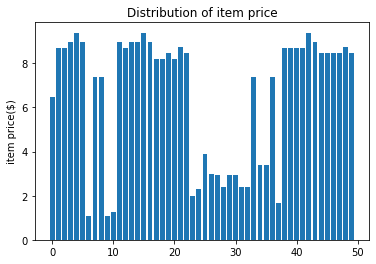

In [28]:
# 음식가격 분포 그래프를 출력

item_name_list = price_per_item.index.tolist()       # 음식리스트에 음식단가 모음 인덱스를 투리스트로 넣음
x_pos = np.arange(len(item_name_list))              # x_pos 에 numpy 
item_price = price_per_item['item_price'].tolist()   # item_price 에 음식 단가 모음에 가격을 넣음

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

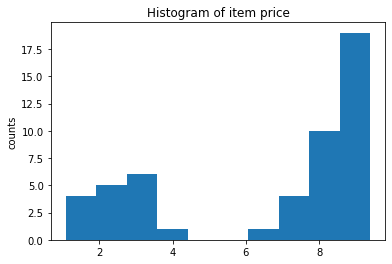

In [29]:
# 음식 가격 히스토그램을 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

In [36]:
# "Beggie Salad Bowl" 이 몇 번 주문되었는지를 계산합니다.

chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)




# drop_uplicates : 한 주문내에서 중복 집계된 item_name 을 제거 한다.

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
